In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matches = pd.read_csv('spi_matches.csv')
club_rankings = pd.read_csv('spi_global_rankings.csv')

In [6]:
matches.columns

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [4]:
top_ten_clubs = club_rankings.loc[(club_rankings['rank'] <= 10)]

In [5]:
top_ten_clubs

,rank,prev_rank,name,league,off,def,spi
0,1,1,Manchester City,Barclays Premier League,3.25,0.25,94.79
1,2,2,Bayern Munich,German Bundesliga,3.43,0.43,93.61
2,3,3,Liverpool,Barclays Premier League,2.85,0.31,91.85
3,4,5,Barcelona,Spanish Primera Division,2.83,0.44,89.63
4,5,4,Paris Saint-Germain,French Ligue 1,2.90,0.50,89.22
5,6,6,Real Madrid,Spanish Primera Division,2.86,0.49,89.06
6,7,8,Atletico Madrid,Spanish Primera Division,2.22,0.31,86.46
7,8,7,Chelsea,Barclays Premier League,2.58,0.51,86.21
8,9,9,Juventus,Italy Serie A,2.55,0.51,85.93
9,10,10,RB Leipzig,German Bundesliga,2.56,0.62,83.98


In [7]:
home_matches = matches.rename(columns={'team1': 'name'})
away_matches = matches.rename(columns={'team2': 'name'})

In [8]:
top_ten_club_home = pd.merge(home_matches, top_ten_clubs, how='inner', on='name')
top_ten_club_away = pd.merge(away_matches, top_ten_clubs, how='inner', on='name')

In [11]:
top_ten_club_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 914
Data columns (total 28 columns):
date           915 non-null object
league_id      915 non-null int64
league_x       915 non-null object
name           915 non-null object
team2          915 non-null object
spi1           915 non-null float64
spi2           915 non-null float64
prob1          915 non-null float64
prob2          915 non-null float64
probtie        915 non-null float64
proj_score1    915 non-null float64
proj_score2    915 non-null float64
importance1    730 non-null float64
importance2    730 non-null float64
score1         794 non-null float64
score2         794 non-null float64
xg1            793 non-null float64
xg2            793 non-null float64
nsxg1          793 non-null float64
nsxg2          793 non-null float64
adj_score1     793 non-null float64
adj_score2     793 non-null float64
rank           915 non-null int64
prev_rank      915 non-null int64
league_y       915 non-null object
off   

In [13]:
top_ten_club_home.columns

Index(['date', 'league_id', 'league_x', 'name', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2', 'rank', 'prev_rank', 'league_y',
       'off', 'def', 'spi'],
      dtype='object')

In [14]:
top_ten_club_home.rename(columns={'spi1': 'spi_at_gametime', 'spi': 'current_spi'}, inplace=True)

In [16]:
top_ten_club_home.columns

Index(['date', 'league_id', 'league_x', 'name', 'team2', 'spi_at_gametime',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2', 'rank', 'prev_rank', 'league_y',
       'off', 'def', 'current_spi'],
      dtype='object')

In [17]:
top_ten_club_home_spi = top_ten_club_home[['date', 'name', 'spi_at_gametime', 'current_spi']]

In [18]:
top_ten_club_away.columns

Index(['date', 'league_id', 'league_x', 'team1', 'name', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2', 'rank', 'prev_rank', 'league_y',
       'off', 'def', 'spi'],
      dtype='object')

In [19]:
top_ten_club_away.rename(columns={'spi2': 'spi_at_gametime', 'spi': 'current_spi'}, inplace=True)

In [20]:
top_ten_club_away_spi = top_ten_club_away[['date', 'name', 'spi_at_gametime', 'current_spi']]

In [21]:
top_ten_club_away_spi.head()

,date,name,spi_at_gametime,current_spi
0,2016-08-12,Paris Saint-Germain,85.68,89.22
1,2016-08-28,Paris Saint-Germain,86.06,89.22
2,2016-09-16,Paris Saint-Germain,84.53,89.22
3,2016-09-23,Paris Saint-Germain,86.26,89.22
4,2016-09-28,Paris Saint-Germain,85.10,89.22


In [25]:
top_ten_club_spi = top_ten_club_home_spi.merge(top_ten_club_away_spi, how='outer')

In [27]:
top_ten_club_spi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 1830
Data columns (total 4 columns):
date               1831 non-null object
name               1831 non-null object
spi_at_gametime    1831 non-null float64
current_spi        1831 non-null float64
dtypes: float64(2), object(2)
memory usage: 71.5+ KB


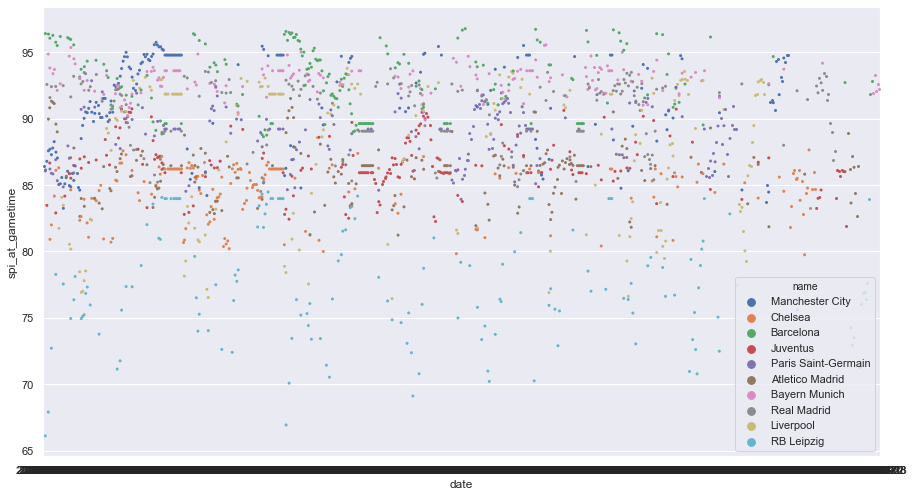

In [38]:
over_time_plot = sns.stripplot(y='spi_at_gametime', x='date', hue='name', data=top_ten_club_spi, size=3)
sns.set(rc={'figure.figsize':(20,8.27)})

In [45]:
mid_range_clubs = club_rankings.loc[(club_rankings['rank'] < 164) & (club_rankings['rank'] >= 159)]

In [46]:
mid_range_clubs

,rank,prev_rank,name,league,off,def,spi
158,159,153,Udinese,Italy Serie A,1.48,1.13,53.95
159,160,158,Amiens,French Ligue 1,1.43,1.08,53.88
160,161,150,Genk,Belgian Jupiler League,1.67,1.33,53.54
161,162,173,Feyenoord,Dutch Eredivisie,1.74,1.41,53.27
162,163,170,Metz,French Ligue 1,1.37,1.05,53.26


In [48]:
club_rankings.shape

(629, 7)

In [49]:
mid_range_home = pd.merge(home_matches, mid_range_clubs, how='inner', on='name')
mid_range_away = pd.merge(away_matches, mid_range_clubs, how='inner', on='name')

In [50]:
mid_range_away.rename(columns={'spi2': 'spi_at_gametime', 'spi': 'current_spi'}, inplace=True)

In [51]:
mid_range_away_spi = mid_range_away[['date', 'name', 'spi_at_gametime', 'current_spi']]

In [52]:
mid_range_home.rename(columns={'spi1': 'spi_at_gametime', 'spi': 'current_spi'}, inplace=True)

In [53]:
mid_range_home_spi = mid_range_home[['date', 'name', 'spi_at_gametime', 'current_spi']]

In [54]:
mid_range_spi = mid_range_home_spi.merge(mid_range_away_spi, how='outer')

In [55]:
mid_range_spi.head()

,date,name,spi_at_gametime,current_spi
0,2016-08-13,Metz,54.34,53.26
1,2016-08-27,Metz,54.47,53.26
2,2016-09-21,Metz,56.98,53.26
3,2016-10-01,Metz,54.79,53.26
4,2016-10-23,Metz,50.53,53.26


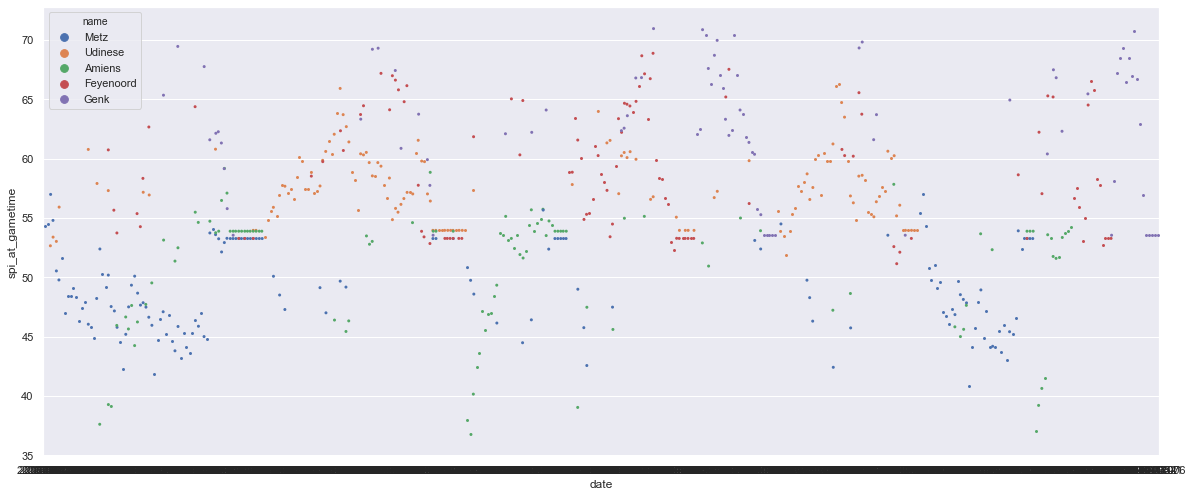

In [56]:
mid_range_over_time_plot = sns.stripplot(y='spi_at_gametime', x='date', hue='name', data=mid_range_spi, size=3)
sns.set(rc={'figure.figsize':(20,8.27)})